## Part-2

In [1]:
# load datatset as done in part-1

In [2]:
# import libraries
import pandas as pd
import numpy as np
import mglearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
X, y = mglearn.datasets.make_wave(n_samples=100)

In [4]:
print(f"shape of X is: {X.shape}, and shape of y is: {y.shape}")

shape of X is: (100, 1), and shape of y is: (100,)


In [5]:
line = np.linspace(-3, 3, endpoint=False, ).reshape(-1,1)

In [6]:
print(f"Shape of linei  is: {line.shape}")

Shape of linei  is: (50, 1)


In [7]:
bins = np.linspace(-3,3,11)
bins

array([-3. , -2.4, -1.8, -1.2, -0.6,  0. ,  0.6,  1.2,  1.8,  2.4,  3. ])

In [8]:
which_bin = np.digitize(X, bins)

In [9]:
which_bin.shape

(100, 1)

In [10]:
which_bin[:5]

array([[ 4],
       [10],
       [ 8],
       [ 6],
       [ 2]], dtype=int64)

In [11]:
from sklearn.preprocessing import OneHotEncoder

In [12]:
encoder = OneHotEncoder(sparse=False).fit(which_bin)

In [13]:
encoder.categories_

[array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)]

In [14]:
# Binning the X_data
X_binned = encoder.transform(which_bin)

In [15]:
print(f"Shape of X_binned is: {X_binned.shape}")

Shape of X_binned is: (100, 10)


In [16]:
# binning the line data
line_binned = encoder.transform(np.digitize(line,bins=bins))

In [17]:
print(f"Shape of line_binned is: {line_binned.shape}")

Shape of line_binned is: (50, 10)


## Interactions and Polynomials

Another way to enrich a feature representation, particularly for linear models, is adding <I>Interaction features</I> and <I>polynomial features</I> of the original data.

In [18]:
X_combined = np.hstack([X,X_binned])

In [19]:
print(f"X_combined.shape = {X_combined.shape}")

X_combined.shape = (100, 11)


In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
reg = LinearRegression().fit(X_combined,y)

In [22]:
line_combined = np.hstack([line, line_binned])

In [23]:
line.shape, line_binned.shape, line_combined.shape

((50, 1), (50, 10), (50, 11))

plot: Linear regression using binned features and a single global scope

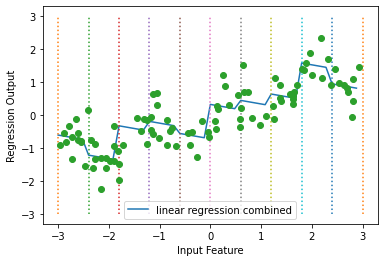

In [24]:
plt.plot(line, reg.predict(line_combined), label = 'linear regression combined')

for bin in bins:
    plt.plot([bin,bin], [-3,3],':')
    
plt.legend(loc='best')
plt.ylabel("Regression Output")
plt.xlabel("Input Feature")
plt.plot(X[:,0], y, 'o')

In [25]:
reg.coef_

array([-0.26930332, -1.43746997, -1.88531979, -0.83367597, -0.53708445,
       -0.74256109,  0.30127093,  0.584209  ,  0.93891885,  2.04130111,
        1.57041139])

In [26]:
reg.intercept_

0.022787470749520998

###### Now,

In [27]:
X_product = np.hstack([X_binned, X*X_binned])
print(X_product.shape)

(100, 20)


Llinear regression with a seperate slope for each bin

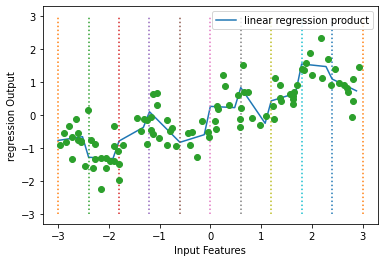

In [28]:
reg = LinearRegression().fit(X_product, y)
line_product = np.hstack([line_binned, line*line_binned])
plt.plot(line, reg.predict(line_product), label='linear regression product')

for bin in bins:
    plt.plot([bin,bin], [-3,3], ':')
    
plt.plot(X[:,0], y, 'o')

plt.ylabel("regression Output")
plt.xlabel("Input Features")
plt.legend(loc='best')

In [29]:
reg.coef_

array([-0.45503081, -1.88217757,  0.37212979, -2.14962198, -0.93495915,
       -0.13335493,  1.78956465, -0.54207592,  1.44822149,  2.48730444,
        0.23766215, -0.08497546,  0.86525795, -1.54375486,  0.48274992,
       -0.07837964, -2.25570023,  0.47949081, -0.16367934, -0.7462927 ])

In [30]:
reg.intercept_

0.39767923255378734

###### Using binning is one way to expand a continuous feature.

###### Another one is to use <I>Polynomials </I> of the original features.

This is implemented in <b>PolynomialFeatures</b> in the preprocessing module:

In [31]:
from sklearn.preprocessing import PolynomialFeatures

In [32]:
# include polynomials upto x**10
# the default *include_bias=True* adds a fetaure that's constantly 1
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

Using a degree 10 yields 10 features

In [33]:
print("X_poly.shape: {}".format(X_poly.shape))

X_poly.shape: (100, 10)


Let's compare the entries of X_poly to those of X:

In [34]:
print("Entries of X:\n{}".format(X[:5]))
print("Entries of X_poly:\n{}".format(X_poly[:5]))

Entries of X:
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
Entries of X_poly:
[[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


<b> get_feature_names </b>

In [35]:
print("Polynomial feature names:\n{}".format(poly.get_feature_names))

Polynomial feature names:
<bound method PolynomialFeatures.get_feature_names of PolynomialFeatures(degree=10, include_bias=False)>


In [36]:
print("Polynomial feature names:\n{}".format(poly.get_feature_names()))

Polynomial feature names:
['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


Using polynomila fetaures together with a linear regression model yields the classical model of <B> polynomial Regression</b>

In [37]:
reg = LinearRegression().fit(X_poly, y)

In [38]:
reg.intercept_

-0.2450520961557201

In [39]:
reg.coef_

array([ 1.20149813,  0.80054452, -1.40082262, -0.66726081,  0.68141161,
        0.21996432, -0.11583144, -0.0302944 ,  0.00632324,  0.00146654])

In [40]:
X_poly.shape

(100, 10)

Shape of line_poly is: (50, 10)


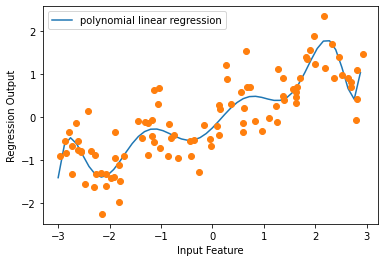

In [41]:
line_poly = poly.transform(line)
print("Shape of line_poly is: {}".format(line_poly.shape))

plt.plot(line, reg.predict(line_poly), label='polynomial linear regression')
plt.plot(X[:,0], y, 'o')

plt.ylabel("Regression Output")
plt.xlabel("Input Feature")
plt.legend(loc="best")

As a comparison, here is a kernel SVM model learned on the original data, without any transformation

In [42]:
from sklearn.svm import SVR

Comparison of different gamma parameters for an SVM with RBF kernel

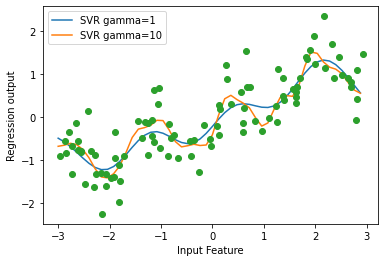

In [43]:
for gamma in [1,10]:
    svr = SVR(gamma=gamma).fit(X,y)
    plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))

plt.plot(X[:,0], y, 'o')
plt.ylabel("Regression output")
plt.xlabel("Input Feature")
plt.legend(loc='best')

Using a more complex model, a kernel SVM, we are able to learn a similarly complex prediction to the polynomial regression without an explicit transformation of the features.

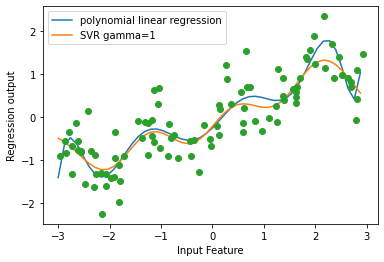

In [44]:
plt.plot(line, reg.predict(line_poly), label='polynomial linear regression')

gamma=1
svr = SVR(gamma=gamma).fit(X,y)
plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))

plt.plot(X[:,0], y, 'o')
plt.ylabel("Regression output")
plt.xlabel("Input Feature")
plt.legend(loc='best')

###### Take another dataset

###### Boston Housing dataset

First we load the data, and rescale it to be between 0 and 1 using <b>MinMaxScalar</b>.

In [45]:
from sklearn.datasets import load_boston

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
from sklearn.preprocessing import MinMaxScaler

In [48]:
boston = load_boston()

In [49]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

We can convert this boston data into pandas DataFrame

In [50]:
df = pd.DataFrame(data=boston.data, columns=boston.feature_names)

In [51]:
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [52]:
boston.data.shape, df.shape

((506, 13), (506, 13))

In [53]:
df['target']=boston.target

In [54]:
df.sample(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
416,10.83420,0.0,18.10,0.0,0.679,6.782,90.8,1.8195,24.0,666.0,20.2,21.57,25.79,7.5
489,0.18337,0.0,27.74,0.0,0.609,5.414,98.3,1.7554,4.0,711.0,20.1,344.05,23.97,7.0


Now,

splitting data into train and test and then rescale it and then apply ML algo.

In [55]:
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0 )

In [56]:
# rescale data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Now, we extract polynomial features and interactions upto a degree of 2:

In [57]:
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

print("X_train.shape: {}".format(X_train.shape))
print('X_train_poly.shape:; {}'.format(X_train_poly.shape))

X_train.shape: (379, 13)
X_train_poly.shape:; (379, 105)


In [58]:
13+13+(13*12//2) +1 # because, include_bias != False in module PolynomilaFeatures()

105

###### get_feature_names()

In [59]:
print("Polynomial feature names: \n {}".format(poly.get_feature_names()))

Polynomial feature names: 
 ['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


The first new feature is a constant feature, called "1" here. The next 13 features are the original features (called "x0" to "x12"). Then follows the first feature squared ("x0^2") and combinations of the first and the other features.

###### Compare Performance with and without interactions:

LinearRegression()

In [60]:
lin_reg = LinearRegression().fit(X_train_scaled, y_train)
print("Score without interactions: {:.3f}".format(
    lin_reg.score(X_test_scaled, y_test)))

lin_reg = LinearRegression().fit(X_train_poly, y_train)
print("Score with interactions: {:.3f}".format(
    lin_reg.score(X_test_poly,y_test)))

Score without interactions: 0.635
Score with interactions: 0.607


### Ridge()

Ridge Regression is <b>an extension of linear regression</b> that <b>adds a regularization penalty to the loss function </b>during training

These extensions are referred to as <b>regularized linear regression</b> or <b>penalized linear regression.</b>

Ridge Regression is a popular type of regularized linear regression that includes an <b>L2 penalty. 

This has the effect of shrinking the coefficients for those input variables that do not contribute much to the prediction task.

ridge_loss = loss + (lambda * l2_penalty)

Linear least squares with l2 regularization. || Minimizes the objective function: || 

This model solves a regression model where the loss function is the linear least squares function and regularization is given by the l2-norm. Also known as Ridge Regression or Tikhonov regularization. This estimator has built-in support for multi-variate regression (i.e., when y is a 2d-array of shape (n_samples, n_targets)).

In [61]:
from sklearn.linear_model import Ridge

In [62]:
ridge = Ridge().fit(X_train_scaled, y_train)
print("Score without interactions: {:.3f}".format(
    ridge.score(X_test_scaled, y_test)))

ridge = Ridge().fit(X_train_poly, y_train)
print("Score with interactions: {:.3f}".format(
    ridge.score(X_test_poly, y_test)))

Score without interactions: 0.621
Score with interactions: 0.753


Clearly, the interactions and polynomial features gave us a good boost in performance when using <b>Ridge.

When using a more complex model like a <b> random forest,</b> the story is
a bit different, though:

In [63]:
from sklearn.ensemble import RandomForestRegressor

In [64]:
rf = RandomForestRegressor(n_estimators=100).fit(X_train_scaled, y_train)
print("Score without interactions : {:.3f}".format(
    rf.score(X_test_scaled, y_test)))

rf = RandomForestRegressor(n_estimators=100).fit(X_train_poly, y_train)
print("Score with interactions: {:.3f}".format(
    rf.score(X_test_poly, y_test)))

Score without interactions : 0.797
Score with interactions: 0.771


Here, it is clear that--

even without additional features, the random forest beats the performance of <b> Ridge.

Adding interactions and polynolmials actually decreases performance slightly.

### Next-- in Part-3